# 目录：

### 1、主客体互倚模型的概念
##### （1）基本概念
##### （2）4中研究主题

### 2、不可分对子的主客体互倚模型
##### （1）使用多层线性模型实现
##### （2）使用结构方程模型实现

### 3、可分对子的主客体互倚模型
##### （1）使用多层线性模型实现
##### （2）使用结构方程模型实现

## 哔站视频：https://www.bilibili.com/video/BV12P41187HX/?spm_id_from=333.999.0.0&vd_source=6de003ac5dadef468504728c181eab42

# 
## 1、主客体互倚模型（Actor–Partner Interdependence Model， APIM）概念

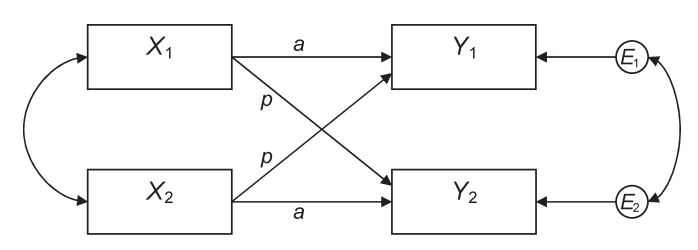

X1 和 X2 是对子（dyad）成员，a的路径效应称之为主体效应（actor effect），p的路径效应称之为客体效应（partner effect）

主体效应和客体效应各自可以细化为两种：

第一个人对自身的主体效应为a1，第二个人对自身的主体效应为a2

第一个人对第二个人的客体效应为p1，第二个人对第一个人的客体效应为p2

E1 和 E2 分别代表 Y1 和 Y2 的残差

## 
## APIM 的4种 research topic

1. Actor-oriented: a ≠ 0, p = 0
2. Partner-oriented: a = 0, p ≠ 0
3. Couple-oriented: a = p
4. Social comparison: a + p = 0

#### 1、Actor-oriented

对子关系中，他人对主体不起作用，主体自身对自己起作用。

例如，在恋爱关系中，自己对爱情做出承诺会增加自己对关系的付出，但是他人对爱情做出承诺未必会增加你对关系的付出 (Rusbult, 1980)。

#### 2、Partner-oriented

对子关系中，主体自身对自己不起作用，他人对主体起作用

例如，恋爱关系，自己的长相对关系满意度无影响，他人长相对关系满意度短期内有影响。（Feingold, 1988）

#### 3、couple-oriented

对子关系中，主体自身和客体都对主体起影响，且主体影响和客体影响相似

例如：在网球比赛中，自身发挥最高水平会让自己满意，对手发挥最高水平也会让自己满意。

这种情况下，模型可能简化：

原模型：Y1 = aX1 + pX2 + E1

简化为：Y1 = 2a(X1 + X2)/2 + E1

一种方法验证：根据上述建模，如果拟合良好，说明 a = p, 如果不佳，则这个假设是错的，进而求证主效应更大还是客体效应更大。

#### 4、Social comparison

对子关系中，主体对自身的影响和客体对自身的影响此消彼长，造成例如主体效应为正，客体效应即为负。

例如：夫妻之间一方取得事业的成功，往往需要另一方牺牲（不成功）为代价，这就构成了一种社会竞争关系。

## 
## 2、估计 APIM 模型：对子不做区分的情况（INDISTINGUISHABLE DYAD MEMBERS）

a1、a2不做区分，p12、p21不做区分

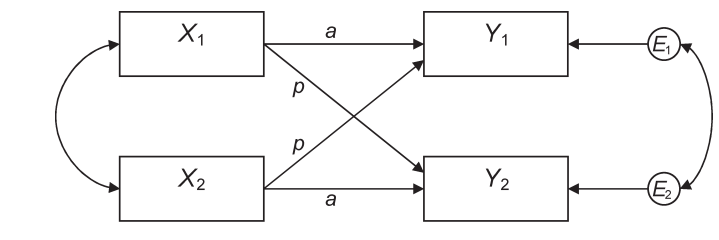

三种方法可以实现 对子不做区分的APIM

1. Pooled-Regression Method

2. SEM method

3. Multilevel Analysis

#### 方法1：使用multilevel analysis实现

整理数据

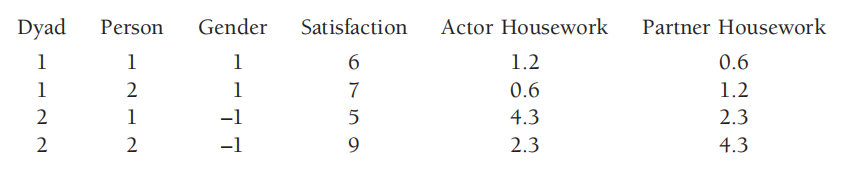


#### Satisfactionij = Intecpt i + aij * ActorHousework + pij * PartnerHousework + eij

i是对子编号（Dyad），j是对子中的人员编号（Person）

该模型第一层是对子，第二层是具体人员

使用 lme4 函数库

mod <- lmer( 

    Satisfaction ~ 1 + ActorHousework + PartnerHousework + (1|Dyad),
    data =  BASE)

summary(mod)

返回结果中 ActorHousework 的路径参数就是主效应，PartnerHousework 的路径参数就是客体效应

#### 方法2：使用SEM建模 APIM 模型

结构方程模型的一个巨大优势是所有参数一次性得到（既包括路径效应，有包括correlation）

需要宽数据的形式：
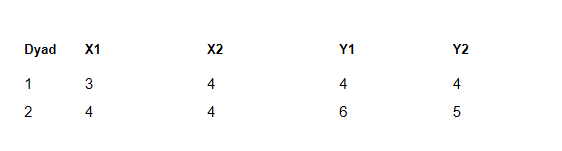


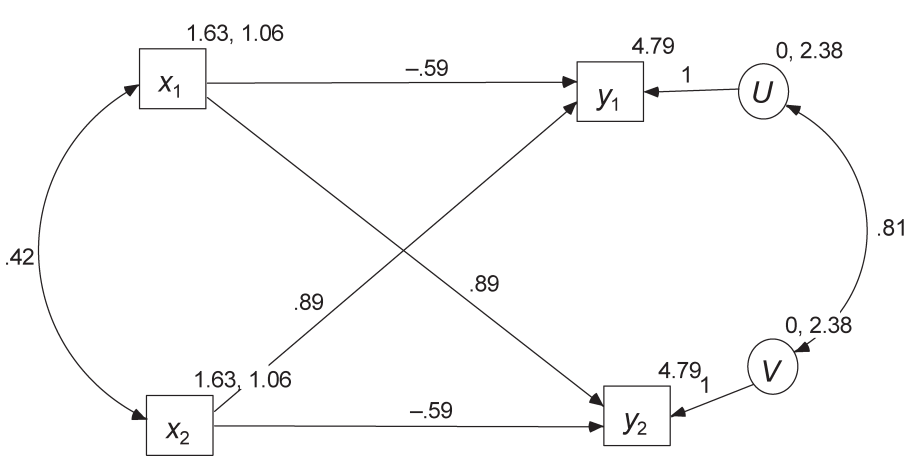

使用 lavaan 函数库的sem函数：

Mod <- "
    #定义路径
    
   y1 ~ a * x1 + p * x2
    
   y2 ~ a * x2 + p * x2
    
   #covariance
   
   x1 ~~ x2
"

FIT <- sem(Mod,data=BASE)

summary(FIT)

#### 方法3：Pooled-Regression Method

假设要研究这样一个故事：

同寝室的学生打扫卫生和房屋整洁之间的关系，如果第一个同学打扫房间时长为 X1 ，第二个同学打扫房间时间长为 X2， 第一个同学结果变量（例如，对房间整洁的满意度）为Y1，第二个同学的结果变量为Y2

对子内结果变量的差异为 （Y1 - Y2），对子内自变量的差异（X1 - X2）

对子间结果变量的差异为  [(Y1 + Y2)/2]，对子间自变量的差异 [(X1 + X2)/2]

相应地，自变量对因变量对子内的等式为：

Y1i – Y2i = bw(X1i – X2i) + Ewi.

自变量对因变量对子间的等式为：

(Y1i + Y2i)/2 = b0 + bb(X1i + X2i)/2 + Ebi.

主体效应 =  (bb + bw)/2

客体效应 =  (bb – bw)/2

#### 数据
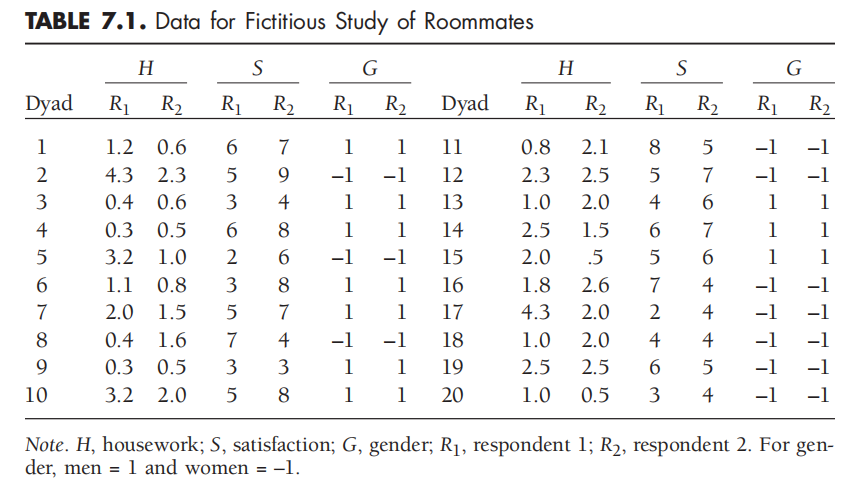

根据数据，估计量等式中的参数：

Y1i – Y2i = bw(X1i – X2i) + Ewi.

(Y1i + Y2i)/2 = b0 + bb(X1i + X2i)/2 + Ebi.

在R中，用lm()函数就可以计算上述参数

bb = 0.297； bw=–1.479

主体效应 = –0.591

客体效应 = 0.888

要比较主体效应和客体效应是否显著不同，可以使用 t 检验

t = (主体效应/poolded standard error) - (客体效应/poolded standard errot) = –0.591/0.25 - 0.888/0.25 =–2.36 - = 3.55

计算 df ，查表判断是否显著。


## 
## 3、估计 APIM 模型：区分对子的情况（DISTINGUISHABLE DYAD MEMBERS）

当对子中不同角色有显著差异时，有必要区分a1、a2，p12、p21

例如，夫妻之间神经质和抑郁倾相通常有明显的差异，且相互夫妻之家相互影响。这样就应该区分对子不同角色了
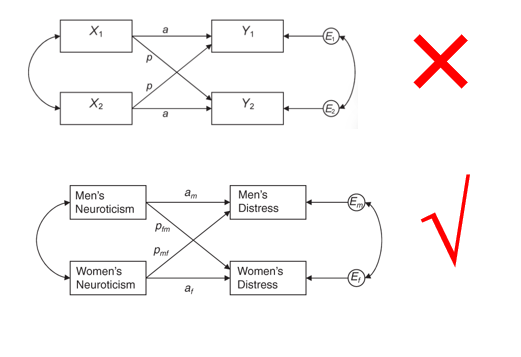

#### 方法1：使用multilevel analysis实现

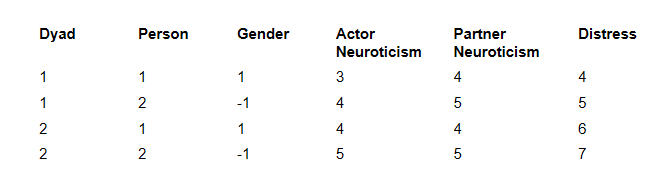

#### Distressij = Intecpt i + aij * Gender * ActorNeuroticism + pij * Gender * PartnerNeuroticism + eij

使用 lme4 函数库

mod <- lmer( 
       
    Distress ~ 1 + Gender*ActorNeuroticism + Gender*PartnerNeuroticism + (1|Dyad),
    data =  BASE)

summary(mod)

同样，可以返回所有的主体效应和客体效应

如何计计算男，女的简单效应？

男性：改变Gender为男1，女0

女性：改变Gender为女1，男0

两个APIM分别表示主体为男的效应、主体为女的效应

#### 方法2：使用SEM实现

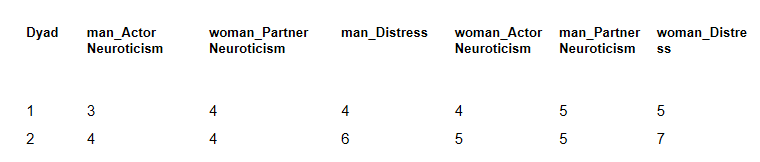


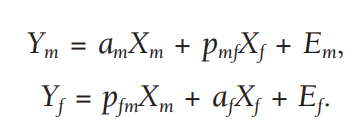

Mod <- " #定义路径

man_Distress ~ man_ActorNeuroticism + man_PartnerNeuroticism

woman_Distress ~ woman_ActorNeuroticism + woman_PartnerNeuroticism

#covariance

man_ActorHousework ~~ man_PartnerNeuroticism + woman_ActorNeuroticism + woman_PartnerNeuroticism

man_PartnerNeuroticism ~~ woman_ActorNeuroticism + woman_PartnerNeuroticism

woman_ActorNeuroticism ~~ woman_PartnerNeuroticism
"

FIT <- sem(Mod,data=BASE)

summary(FIT)

## 
## 参考文献:

Rusbult, C. E. (1980). Commitment and satisfaction in romantic associations: A
test of the investment model. Journal of Experimental Social Psychology, 16,
172–186

Feingold, A. (1988). Matching for attractiveness in romantic partners and samesex friends: A meta-analysis and theoretical critique. Psychological Bulletin,
104, 226–235.